<a href="https://colab.research.google.com/github/Vladimir-Shch/airbyte_lab/blob/main/%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Сверточная нейронная сеть

**Сonvolutional neural network (CNN, ConvNet)**, или **Сверточная нейронная сеть** — класс глубоких нейронных сетей, часто применяемый в анализе визуальных образов. Сверточные нейронные сети являются разновидностью многослойного перспептрона с использованием операций свёртки.

<br>

## Принцип работы операции свертки

Операцию свёртки можно представить следующим алгоритмом:

1. Скользящее окно, называемое **фильтром**, с размером $(n,n)$ двигается по входному признаку. Количество движений определяется заданным количеством фильтров. Каждый полученный шаблон имеет форму $(n,n,d)$, где $d$ — глубина входного признака.

2. Каждый шаблон умножается на своё ядро свёртки, в результате, формируется выходная карта признаков.

3. Полученная выходная карта признаков имеет форму $(h,w,N)$, где $h$ и $w$ — длина и ширина, полученные в результате отсечения, а $N$ — количество фильтров.

Количество фильтров $N$ выбирается самостоятельно. Обычно его подбирают как степень двойки с увеличением количества фильтров по мере увеличения глубины архитектуры. А ядра свёртки являются обучаемыми параметрами.

Рассмотрим процесс свёртки на примере изображения в оттенках серого с размером $(28, 28)$. Глубина изображения в оттенках серого равна 1, если бы это было RGB, то глубина входа равнялась бы 3. Пусть размер фильтра равняется $(3, 3)$, а всего их 32.
<br><br>
1. На первом этапе сформируются 32 шаблона размером $(3,3,1)$, где 1 — глубина изображения.
2. Полученные шаблоны умножаются на ядра свертки. Каждый преобразованный в результате умножения шаблон формирует вектор с длиной равной количеству фильтров, т.е. 32.
3. Все преобразованные шаблоны объединяются в выходную карту признаков. Она имеет размер $(26,26,32)$


## Почему уменьшается размерность после операции свёртки

В рассмотренном выше примере выходная карта признаков имеет размерность $(26,26,32)$, в то время как исходное изображение имело размерность $(28,28,1)$. Если 32 — количество фильтров, а 1 — глубина входа, тогда почему исходный размер 28 уменьшился до 26?

Рассмотрим матрицу $(5,5)$ и фильтр $(3,3)$. Дело в том, что центр скользящего окна может встать только в 9 клеток матрицы $(5,5)$ , как это показано на рисунке ниже. Следовательно, после умножения на ядра свёртки сформируется выходная карта признаков с высотой и шириной $(3,3)$.

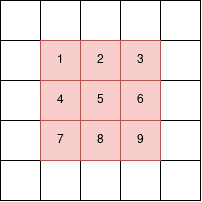

9 положений, куда может поместиться центр фильтра $(3,3)$

Для фильтра с размером $(5,5)$ исходное изображение $(28,28)$ уменьшилось бы в $(24,24)$. Иногда такого обрезания можно избежать путём эффекта дополнения (padding). Он заключается в добавлении строк и столбцов так, что центр скользящего окна можно поместить в каждую клетку. Для фильтра $(3,3)$ добавляются строки сверху и снизу и столбцы слева и справа. Для фильтра $(5,5)$ добавляются по 2 строки снизу и сверху и 2 столбца слева и справа.\

<br>

##Слой Pooling

В сверточных нейронных сетях применяется ещё один слой, называемый **слоем Pooling**. Суть этого слоя заключается в уменьшении размерности карты признаков.

Pooling имеет две разновидности: **max-pooling** и **average-pooling**. В большинстве случаев применяется max-pooling. Операция Pooling схожа с операцией свертки:

1. Скользящее окно, обычно это окно $(2,2)$, двигается по карте признаков.
2. Из выбранного шаблона выбирается максимальное (max-pooling) или среднее (average-pooling) значение.
3. Формируется уменьшенная в размере карта признаков.

На рисунке ниже показано, как из матрицы $(4,4)$ получается выходная карта $(2,2)$ после операции max-pooling и average-pooling.

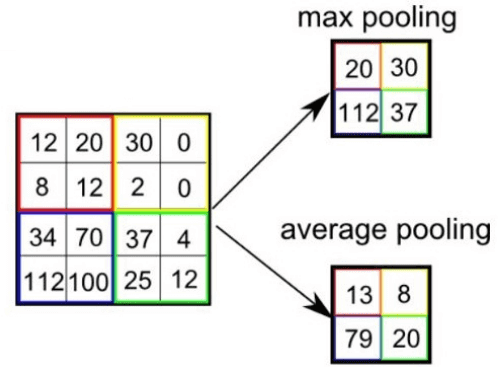

Зачем нужно уменьшать размерность с помощью Pooling? На это есть несколько причин:

  1. Для поддержания иерархичности. Архитектура сверточных нейронных сетей похожа на воронку, где все начинается с большой картины с последующим углублением в отдельные детали. Человеческий мозг устроен также: сначала он видит на улице кошку, а затем начинает разглядывать ее цвет, пятна, уши, глаза и т.д. Это является основой Deep learning — обучение на представлениях.
  2. Уменьшение размерности приводит к уменьшению количества обучаемых коэффициентов, поэтому это ещё и выигрыш в вычислительных ресурсах.


##Практика

Обучим модель классфикации на основе сверточной нейронной сети на основе набора данных `cifar10`

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn import metrics
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Получим наборы данных и нормализуем изображения

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализация пикселей изображения [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


Рассмотрим некоторые примеры из набора данных

В нашем наборе имеются картинки разделённые по 10 классам:

<br>

- самолёт
- автомобиль
- птица
- кошка
- олень
- собака
- лягушка
- дом
- корабль
- грузовик

<br>

Ниже представлен код, который выводит некоторые примеры из набора данных:

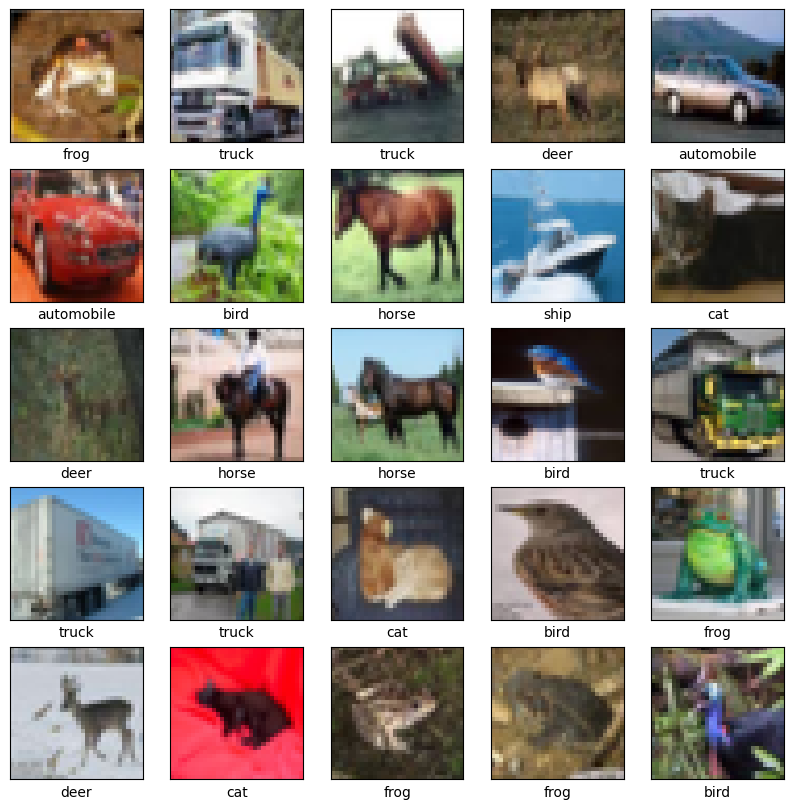

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Построение архитектуры сверточной сети

Первым слоем сети поставим слой свертки `Conv2D` на входе размером $32х32$ (это размер изображения) и слой `MaxPooling`, чтобы выделить первую карту признаков.

<br>

Затем  повторяем процедуру, чтобы выять "признаки признаков" в фрагментах изображения. Наконец, последние 3 слоя дадут нам на выходе вероятности принадлежности изображения к одному из классов

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Скомпилируем модель, в качестве оптимизатора используем алгоритм Adam. Функция потерь - категориальная кросс-энтропия.

Чтобы отследить изменение качества модели на тестовой выборке в процессе обучения, передадим нашу тестовую выборку в аргумент `validation_data`

Также для ускорения процесса обучения и повышения ее эффективности применим обучения по батчам. В процессе обучения модель будет получать набор данных по частям. В нашем случае размер батча (части набора) равен 16

Процесс обучения может занять некоторое время (около 30 минут), не закрывайте вкладку, дождитесь завершения обучения модели

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=32, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 77s 48ms/step - loss: 1.2458 - accuracy: 0.5569 - val_loss: 1.1063 - val_accuracy: 0.6121
Epoch 2/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0911 - accuracy: 0.6159 - val_loss: 1.0022 - val_accuracy: 0.6563
Epoch 3/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0142 - accuracy: 0.6445 - val_loss: 0.9643 - val_accuracy: 0.6634
Epoch 4/15
1563/1563 [==============================] - 73s 46ms/step - loss: 0.9574 - accuracy: 0.6681 - val_loss: 0.9139 - val_accuracy: 0.6856
Epoch 5/15
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9188 - accuracy: 0.6778 - val_loss: 0.9222 - val_accuracy: 0.6849
Epoch 6/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8848 - accuracy: 0.6894 - val_loss: 0.8835 - val_accuracy: 0.6987
Epoch 7/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8604 - accuracy: 0.6994 - val_loss: 0.8769 -

Рассмотрим историю процесса обучения  и сделаем выводы о ходе обучения

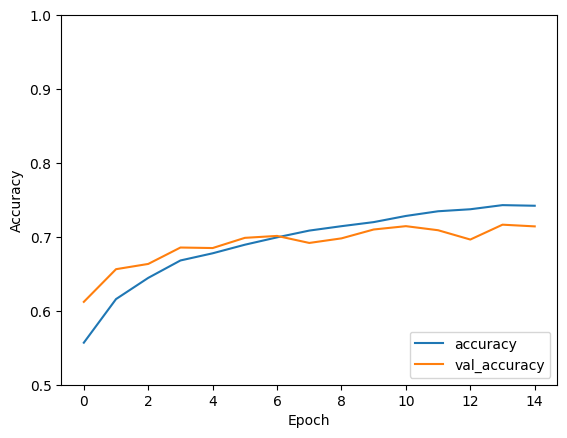

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

На графике мы видим изменение общей точности модели по количеству прошедших эпох. Синий график показывавает точность модели на тренировочной выборке. Видно, что в целом график идет вверх, что говорит нам о нормальном ходе обучения.

<br>

Оранжевый график показывает изменение точности по прошедшим эпохам для тестовой выборки. График также постепенно восходит вверх, что говорит нам об улучшении качества по тестовой выборке

Оценим работу модели по метрикам качества для задач классификации (см.пример в Лаб 2)

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

prediction = model.predict(test_images)
predictions = [np.argmax(i) for i in prediction]

print(classification_report(test_labels, predictions, target_names=class_names))

313/313 - 3s - loss: 0.8262 - accuracy: 0.7142 - 3s/epoch - 10ms/step
313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

    airplane       0.74      0.75      0.75      1000
  automobile       0.85      0.82      0.83      1000
        bird       0.67      0.56      0.61      1000
         cat       0.51      0.54      0.52      1000
        deer       0.67      0.70      0.68      1000
         dog       0.64      0.60      0.62      1000
        frog       0.72      0.83      0.77      1000
       horse       0.78      0.73      0.75      1000
        ship       0.74      0.86      0.80      1000
       truck       0.85      0.75      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



Построим матрицу несоотвествий и оценим способность модели различать классы

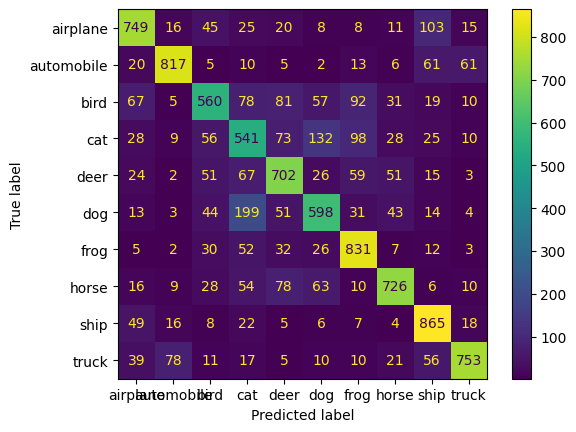

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = class_names)
cm_display.plot()
plt.show()

**Задание на лабораторную работу**

Обучить модель по наборе данных вариантам:

1. fasion-mnist
2. mnist

Сделать вывод по ходу процесса обучения

Сделать выводы о процессе обучения и качестве модели на основе метрик и матрицы несоответствий, рассмотренных выше